In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_train=pd.read_csv("/content/trainset.csv")
train_data=df_train.iloc[:, 1:2].values

In [ ]:
train_data.reshape(-1,1)

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = sc.fit_transform(train_data)

In [ ]:
X_train = []
y_train = []
for i in range(60 , len(df_train)):
  X_train.append(train_data_scaled[i-60:i, 0])
  y_train.append(train_data_scaled[i,0])

X_train, y_train =  np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units = 60))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = "adam", loss="mean_squared_error")

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 60ms/step - loss: 0.0278
Epoch 2/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0045
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0037
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0033
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0032
Epoch 6/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0032
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0035
Epoch 8/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0032
Epoch 9/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0036
Epoch 10/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0027
Epoch 11/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0028
Epoch 13/100
38/38 [=====

In [ ]:
df_test = pd.read_csv("testset.csv")
real_stock_price = df_test.iloc[:, 1:2].values

In [ ]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) -60: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range (60, 60+(len(df_test))):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediction = model.predict(X_test)

In [ ]:
prediction=sc.inverse_transform(prediction)
prediction

array([[1066.6918],
       [1065.5591],
       [1068.325 ],
       [1077.1178],
       [1087.7278],
       [1097.2659],
       [1104.7252],
       [1106.8682],
       [1107.6055],
       [1107.4863],
       [1113.123 ],
       [1119.7628],
       [1125.8857],
       [1130.3613],
       [1134.2031],
       [1141.3815],
       [1152.0947],
       [1160.7749],
       [1166.455 ],
       [1169.8165],
       [1170.1746],
       [1170.1002],
       [1169.1243],
       [1161.0743],
       [1146.2452],
       [1121.2878],
       [1106.9452],
       [1099.4385],
       [1089.5269],
       [1084.6063],
       [1083.1655],
       [1083.4575],
       [1088.9133],
       [1096.6614],
       [1102.6404],
       [1108.091 ],
       [1113.4032],
       [1116.4268],
       [1120.2635],
       [1126.4875],
       [1129.1531],
       [1126.5068],
       [1112.4408],
       [1100.4569],
       [1098.9286],
       [1102.2612],
       [1111.1182],
       [1123.9154],
       [1139.808 ],
       [1153.3859],


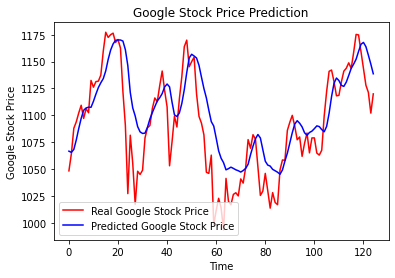

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(prediction, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()